********************************************************
new spectra data is crashing the code
********************************************************
path is /home/jinlng/test_dir/Type_IIn/ZTF19aaksxgp/ZTF19aaksxgp_data_Marshal.txt
row is ['2019 Feb 12', '2458526.9764', 'g', '-17.02', '19.51', '0.22', '19.71', 'P48+ZTF', '1', 'None', 'None', 'True']
(12,)
2458526.9764
row is ['2019 Feb 25', '2458539.8742', 'r', '-17.33', '19.20', '0.20', '19.79', 'P48+ZTF', '1', 'None', 'None', 'True']
(12,)
2458539.8742
row is ['2019 Feb 25', '2458539.8742', 'r', '-17.33', '19.20', '0.20', '19.79', 'P48+ZTF', '1', 'None', 'None', 'True']
(12,)
2458539.8742
row is ['2019 Feb 25', '2458539.8979', 'g', '-17.37', '19.16', '0.21', '19.11', 'P48+ZTF', '1', 'None', 'None', 'True']
(12,)
2458539.8979
row is ['2019 Mar 01', '2458543.9825', 'g', '-17.51', '19.02', '0.08', '20.67', 'P48+ZTF', '1', 'None', 'None', 'True']
(12,)
2458543.9825
row is ['2019 Mar 05', '2458547.8756', 'g', '-17.55', '18.99', '0.10', 

INFO:calibrate_spectrum_using_phot:output_path/txt_files did exist
INFO:calibrate_spectrum_using_phot:calibrated_spectrum_flux_through_filter-Photometry[2]=6.162975822039155e-33


Filter_object[0].AB_zero_flux is 2.639932202863843e-09 erg / angstrom * centimeter ** 2 * second
***
r_p48
P48+ZTF
***
Filter_vector is [['ztf_p48', 'r_p48']]
Filter_object[0].AB_zero_flux is 2.639932202863843e-09 erg / angstrom * centimeter ** 2 * second
you provided a numpy array for the spectrum
Library contains:  252  filters
Filter_vector is [['ztf_p48', 'r_p48']]
Filter: ZTF_P48_R, <pyphot.phot.Filter object at 0x7f0223315198>
The filter needs to be scaled up by a factor of 0.026373153633673745 in order to math the photometry


INFO:calibrate_spectrum_using_phot:output_path/txt_files did exist
INFO:calibrate_spectrum_using_phot:calibrated_spectrum_flux_through_filter-Photometry[2]=nan


you provided a numpy array for the spectrum
Library contains:  252  filters
Filter_vector is [['ztf_p48', 'r_p48']]
Filter: ZTF_P48_R, <pyphot.phot.Filter object at 0x7f01db006470>
The filter needs to be scaled up by a factor of nan in order to math the photometry
the date is 2019-04-07 00:38:07.348
the date is 2019-03-14 02:21:30.454
there are 2 spectra_cal in total
i is 0
offsets[i] is 0.0
spectra[i].date_utc_hms() 2019-03-14 02:21:30.454
spectra[i].instrument P60
i is 1
offsets[i] is 1.0
spectra[i].date_utc_hms() 2019-04-07 00:38:07.348
spectra[i].instrument NOT


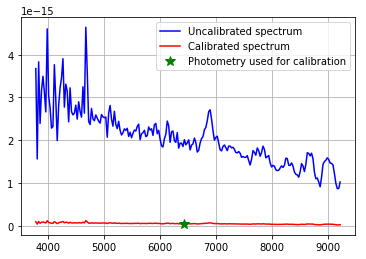

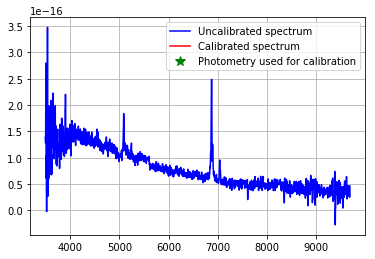

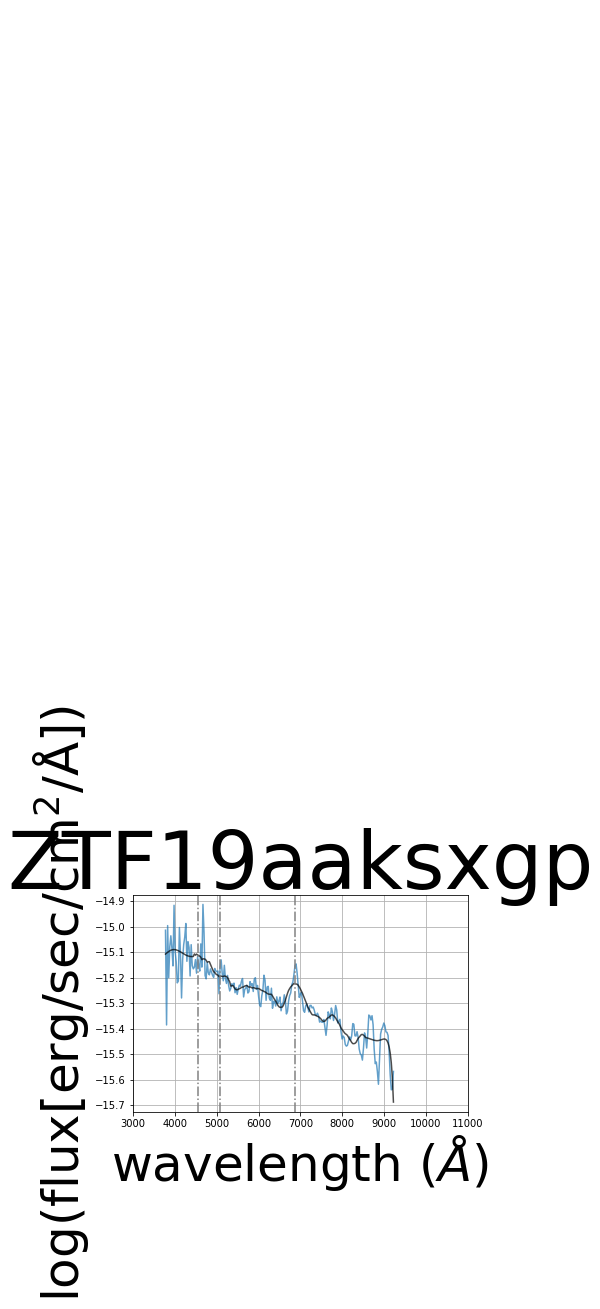

In [39]:
"""********************************************************
new spectra data is crashing the code
********************************************************"""
__author__ = 'Jingyi'

print(__doc__)

import distances_conversions
import Read_data
import class_spectrum
import numpy as np
import pylab
import pdb
import pyphot
from scipy import signal
import matplotlib.pyplot as plt

filters_directory='/home/jinlng/test_dir/Type_IIn/Filters/Filters'

### ZTF19aaksxgp ###
z = 0.0467     # checked
linesx = {r'$H_{\alpha}$': 6563, r'$H_{\beta}$': 4861, r'$H_{\gamma}$': 4341}
    #, r'$H_{\delta}$': 4102,r'$H_{\epsilon}$': 3970, r'$H_{\zeta}$': 3889, r'$H_{\eta}$': 3835}
distance_modulus = 36.53       # checked
distance_pc = distances_conversions.DM_to_pc(distance_modulus)   # sn distance in pc
EBV = 0.049112      # checked
explosion_date = 2458524.6050067847 # checked
data_dicts = Read_data.read_data_Marshall_simple(
    '/home/jinlng/test_dir/Type_IIn/ZTF19aaksxgp/ZTF19aaksxgp_data_Marshal.txt',     # good to go
    filters_directory=filters_directory)

P48_r_array = np.zeros((np.shape(data_dicts['jd'][data_dicts['filter']=='r_p48'])[0],2))
P48_r_array[:,0] = data_dicts['jd'][data_dicts['filter']=='r_p48']
P48_r_array[:,1] = data_dicts['flux'][data_dicts['filter']=='r_p48']

### Calibration ###
### 1 ###
spec_1 = class_spectrum.spectrum(path_to_data=
    '/home/jinlng/test_dir/Type_IIn/ZTF19aaksxgp/ZTF19aaksxgp_20190314_P60_v1.ascii', # good to go, time checked
    instrument='P60',skiprows=0,time='2019-03-14T02:21:30.453758',time_format='utc',show=False)
spec_1_cal = spec_1.calibrate(array_of_calibrating_data=P48_r_array,
    filter_family='ztf_p48',filter_name='r_p48',filters_directory=filters_directory)
### 2 ###
spec_2 = class_spectrum.spectrum(path_to_data=
    '/home/jinlng/test_dir/Type_IIn/ZTF19aaksxgp/ZTF19aaksxgp_20190407_NOT_v1.ascii',
    instrument='NOT',skiprows=0,time='2019-04-07T00:38:07.348',time_format='utc',show=False)# time not clear
spec_2_cal = spec_2.calibrate(array_of_calibrating_data=P48_r_array,
    filter_family='ztf_p48',filter_name='r_p48',filters_directory=filters_directory)

spectra = [spec_1, spec_2]
spectra_cal = [spec_1_cal, spec_2_cal]


dates = []
for i in spectra[::-1]:
    print('the date is',i.date_utc_hms())
    dates.append(i.date_utc_hms())

print('there are {0} spectra_cal in total'.format(len(spectra_cal)))

offsets = np.zeros(len(spectra))
for i in range(len(spectra_cal)):
    offsets[i] = i

phases = ['+'+str(round(spectra[i].date_jd()-explosion_date,2)) for i in range(len(spectra))]
annotations = [(8900,-11.5),(10000,-12.5)]

### smoothing ###
signal_smooth = []
for i in range(len(spectra_cal)):
    signal_smooth.append(signal.savgol_filter(spectra_cal[i][:,1],53,7))


#plot all spectrum
fig = plt.figure()
for i,speci in enumerate(spectra_cal):
    print('i is',i)
    print('offsets[i] is',offsets[i])
    print('spectra[i].date_utc_hms()',spectra[i].date_utc_hms())
    print('spectra[i].instrument',spectra[i].instrument)
    plt.plot(speci[:, 0], np.log10(speci[:, 1]) + offsets[::-1][i],
               label=spectra[i].instrument + ', ' + spectra[i].date_utc_hms(), alpha=0.7)
# plot each smoothed spectrum
for i,speci in enumerate(signal_smooth):
    plt.plot(spectra_cal[i][:, 0], np.log10(speci) + offsets[::-1][i], '-k', alpha=0.7)

for i,j in linesx.items():
    plt.axvline(j*(z+1),linestyle='-.',color='grey')
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
for i,j in enumerate(annotations):
    ax.annotate(phases[i],xy = (annotations[i]), fontsize=35)
plt.title('ZTF19aaksxgp', fontsize=80)
#plt.ylim(-17,-12.5)
plt.xlim(3000,11000)
plt.ylabel(r'$\rm{log(flux [erg/sec/cm^2/\AA ])}$', fontsize=50)
plt.xlabel(r'wavelength ($\AA$)', fontsize=50)
plt.grid()
plt.show()

In [11]:
print(spec_1_cal)

[[3.77670000e+03 9.69477128e-17]
 [3.80230000e+03 4.12212391e-17]
 [3.82790000e+03 1.01088298e-16]
 [3.85340000e+03 6.31900761e-17]
 [3.87900000e+03 8.34182849e-17]
 [3.90460000e+03 9.21741719e-17]
 [3.93010000e+03 8.24424783e-17]
 [3.95570000e+03 7.02317081e-17]
 [3.98130000e+03 1.21421999e-16]
 [4.00680000e+03 8.03589991e-17]
 [4.03240000e+03 7.27371577e-17]
 [4.05800000e+03 6.02626561e-17]
 [4.08360000e+03 6.12384627e-17]
 [4.10910000e+03 9.93212966e-17]
 [4.13470000e+03 7.78535495e-17]
 [4.16030000e+03 5.25880683e-17]
 [4.18580000e+03 7.40821886e-17]
 [4.21140000e+03 8.50534205e-17]
 [4.23700000e+03 9.11456190e-17]
 [4.26260000e+03 1.03013538e-16]
 [4.28810000e+03 7.32118745e-17]
 [4.31370000e+03 8.73742580e-17]
 [4.33930000e+03 8.30490608e-17]
 [4.36480000e+03 6.41395096e-17]
 [4.39040000e+03 8.50797936e-17]
 [4.41600000e+03 7.03372007e-17]
 [4.44160000e+03 6.84119605e-17]
 [4.46710000e+03 6.94405135e-17]
 [4.49270000e+03 7.43459201e-17]
 [4.51830000e+03 6.57746452e-17]
 [4.543800